In [1]:
import numpy as np
import jax
import jax.numpy as jnp

from jax import jit, vmap, block_until_ready
from envs.single_photon_env import SinglePhotonLangevinReadoutEnv

import matplotlib.pyplot as plt

In [2]:
raw_final_actions = np.load('final action batch fig 4.npy')
print(raw_final_actions.shape)

(9, 256, 121)


In [4]:
flattened_actions = raw_final_actions.reshape(-1, raw_final_actions.shape[-1])
flattened_actions.shape

(2304, 121)

In [5]:
from env_configs import get_sherbrooke_config

env = SinglePhotonLangevinReadoutEnv(**get_sherbrooke_config())

In [6]:
batch_action_prepper = jit(vmap(env.prepare_action, in_axes=0))
prepped_actions = batch_action_prepper(flattened_actions)

In [7]:
smooth_actions = prepped_actions / env.a0

smooth_actions.shape

(2304, 121)

In [8]:
smooth_actions = smooth_actions.reshape(*raw_final_actions.shape)

In [9]:
smooth_actions.shape

(9, 256, 121)

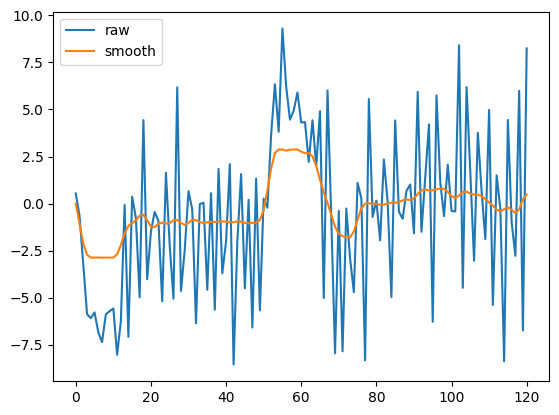

In [11]:
plt.plot(raw_final_actions[4, 100], label='raw')
plt.plot(smooth_actions[4, 100], label='smooth')
plt.legend()
plt.show()

In [12]:
np.save('Smooth Final Action Batch Fig 4', smooth_actions)